# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(We are going to extract (webscrapping) historical USD/IDR currency price data from Exchange-Rates.org in order to find the recent USD/IDR trend.)


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:1000])


table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/5/2021
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-5-2021">
     14,292.17893
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-5-2021">
     USD IDR rate for 3/5/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/4/2021
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-4-2021">
     14,261.85426
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-4-2021">
     USD IDR rate for 3/4/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/3/2021
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-3-2021">
     14,257.29443
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-3-2021">
     USD IDR rate for 3/3/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>


Do the scrapping process here (please change this markdown with your explanation)

In [5]:
tr = table.find_all('tr')

tr[:12]

[<tr><td>3/5/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/3-5-2021">14,292.17893</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-5-2021">USD IDR rate for 3/5/2021</a></td></tr>,
 <tr><td>3/4/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-4-2021">14,261.85426</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-4-2021">USD IDR rate for 3/4/2021</a></td></tr>,
 <tr><td>3/3/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/3-3-2021">14,257.29443</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-3-2021">USD IDR rate for 3/3/2021</a></td></tr>,
 <tr><td>3/2/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/3-2-2021">14,256.28041</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-2-2021">USD IDR rate for 3/2/2021</a></td></tr>,
 <tr><td>3/1/2021</td><td>Monday</td><td><a href="/Rate/USD/IDR/3-1-2021">14,248.60576</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rat

In [6]:
temp = [] #initiating a tuple

for i in list(range(1, 12)) + list(range(14, 36)) + list(range (38,130)):
    row = table.find_all('tr') [i]

    
    #get tanggal
    Tanggal = row.find_all('td')[0].text
    Tanggal = Tanggal.strip()
    
    #get USD_IDR
    USD_IDR = row.find_all('td')[2].text
    USD_IDR = USD_IDR.replace('IDR','')
    USD_IDR = USD_IDR.replace(',','')
    USD_IDR = USD_IDR.strip()
    
    temp.append((Tanggal,USD_IDR))
    #scrapping process
    
temp 

[('3/4/2021', '14261.85426'),
 ('3/3/2021', '14257.29443'),
 ('3/2/2021', '14256.28041'),
 ('3/1/2021', '14248.60576'),
 ('2/26/2021', '14300.27815'),
 ('2/25/2021', '14139.73096'),
 ('2/24/2021', '14083.03673'),
 ('2/23/2021', '14092.64503'),
 ('2/22/2021', '14118.07274'),
 ('2/19/2021', '14066.79375'),
 ('2/18/2021', '14013.51318'),
 ('2/16/2021', '13935.96629'),
 ('2/15/2021', '13918.18725'),
 ('2/12/2021', '13988.54710'),
 ('2/11/2021', '13982.27900'),
 ('2/10/2021', '13994.09212'),
 ('2/9/2021', '13920.52018'),
 ('2/8/2021', '14007.25257'),
 ('2/5/2021', '14008.99630'),
 ('2/4/2021', '14020.87878'),
 ('2/3/2021', '13997.60682'),
 ('2/2/2021', '14004.60175'),
 ('2/1/2021', '14025.27450'),
 ('1/29/2021', '14027.32457'),
 ('1/28/2021', '14048.06146'),
 ('1/27/2021', '14048.72649'),
 ('1/26/2021', '14062.91108'),
 ('1/25/2021', '14021.11609'),
 ('1/22/2021', '14025.60268'),
 ('1/21/2021', '13964.91920'),
 ('1/20/2021', '14021.43046'),
 ('1/19/2021', '14063.60877'),
 ('1/18/2021', '140

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd

df = pd.DataFrame(temp, columns =('Tanggal','USD_IDR'))

df.head(20)

,Tanggal,USD_IDR
0,3/4/2021,14261.85426
1,3/3/2021,14257.29443
2,3/2/2021,14256.28041
3,3/1/2021,14248.60576
4,2/26/2021,14300.27815
5,2/25/2021,14139.73096
6,2/24/2021,14083.03673
7,2/23/2021,14092.64503
8,2/22/2021,14118.07274
9,2/19/2021,14066.79375


In [8]:
df.dtypes

Tanggal    object
USD_IDR    object
dtype: object

In [9]:
df['USD_IDR'] = df['USD_IDR'].astype('float64')
df['Tanggal'] = df['Tanggal'].astype('datetime64')

In [10]:
df.dtypes

Tanggal    datetime64[ns]
USD_IDR           float64
dtype: object

In [11]:
df=df.round(2)
df.head(10)

,Tanggal,USD_IDR
0,2021-03-04,14261.85
1,2021-03-03,14257.29
2,2021-03-02,14256.28
3,2021-03-01,14248.61
4,2021-02-26,14300.28
5,2021-02-25,14139.73
6,2021-02-24,14083.04
7,2021-02-23,14092.65
8,2021-02-22,14118.07
9,2021-02-19,14066.79


In [12]:
df = df.set_index('Tanggal')
df

,USD_IDR
Tanggal,
2021-03-04,14261.85
2021-03-03,14257.29
2021-03-02,14256.28
2021-03-01,14248.61
2021-02-26,14300.28
...,...
2020-09-17,14829.42
2020-09-16,14807.89
2020-09-15,14843.45


In [13]:
period = pd.date_range(start="2020-10-15", end="2021-03-04")
period

DatetimeIndex(['2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18',
               '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22',
               '2020-10-23', '2020-10-24',
               ...
               '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26',
               '2021-02-27', '2021-02-28', '2021-03-01', '2021-03-02',
               '2021-03-03', '2021-03-04'],
              dtype='datetime64[ns]', length=141, freq='D')

In [14]:
df = df.reindex(period)
df

,USD_IDR
2020-10-15,14667.95
2020-10-16,14688.44
2020-10-17,NaN
2020-10-18,NaN
2020-10-19,14705.13
...,...
2021-02-28,NaN
2021-03-01,14248.61
2021-03-02,14256.28
2021-03-03,14257.29


<AxesSubplot:>

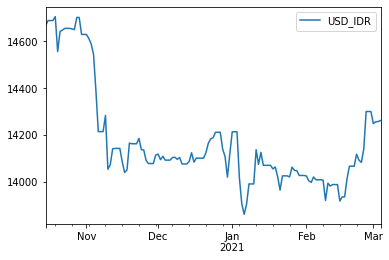

In [15]:
df.ffill().plot.line()

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

    First, I changed the data types accordingly for the dates and the USD/IDR (float) as well as setting the dates as the 
    index column. Then for the time series data frame, I set the period of the data to smoothen it out since 
    some dates are missing. Using, ffill, we filled the missing dates with the last closing currency price. 

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

We are seeing the strengthening of Rupiah since November 2020 and it reached it's strongest level in January 2021. 


### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.